### Clustering, is an unsupervised machine learning task. It involves automatically discovering natural grouping in data.

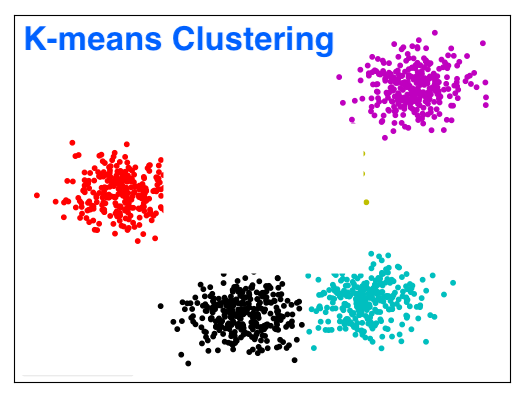

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
# Kmeans intro, train_test_split Scalling, elbow method
# 

In [2]:
df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [12]:
encoder = LabelEncoder()
df['s'] = encoder.fit_transform(df['Species'])

In [15]:
df.sample(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,s
76,77,6.8,2.8,4.8,1.4,Iris-versicolor,1
136,137,6.3,3.4,5.6,2.4,Iris-virginica,2
46,47,5.1,3.8,1.6,0.2,Iris-setosa,0
18,19,5.7,3.8,1.7,0.3,Iris-setosa,0
85,86,6.0,3.4,4.5,1.6,Iris-versicolor,1
113,114,5.7,2.5,5.0,2.0,Iris-virginica,2
69,70,5.6,2.5,3.9,1.1,Iris-versicolor,1
38,39,4.4,3.0,1.3,0.2,Iris-setosa,0
94,95,5.6,2.7,4.2,1.3,Iris-versicolor,1
87,88,6.3,2.3,4.4,1.3,Iris-versicolor,1


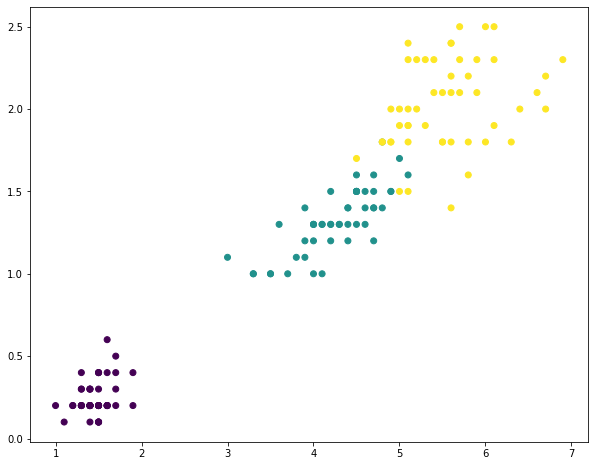

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'], c= df.s)
plt.show()

No handles with labels found to put in legend.


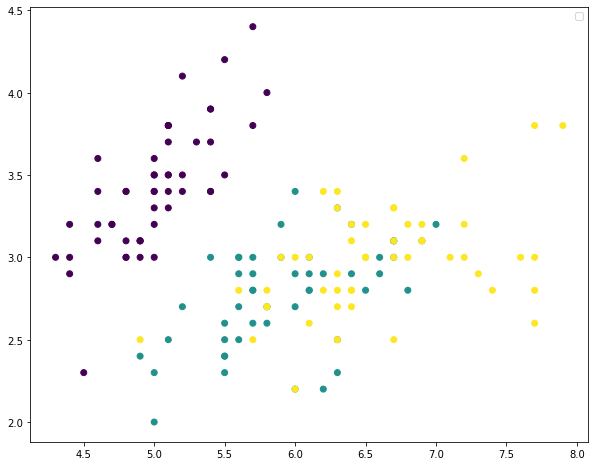

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c= df.s)
plt.legend()
plt.show()

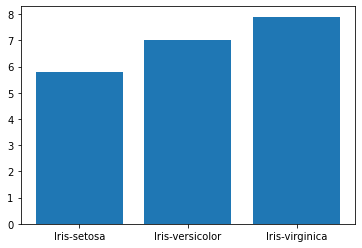

In [25]:
plt.bar(df['Species'],df['SepalLengthCm'])
plt.show()

In [37]:
# Prepare dataset

X = df.drop(['Id','Species','s'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
model = KMeans(n_clusters=3)
model.fit(X)
pred = model.predict(X)

In [39]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [40]:
X['cluster'] = pred
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
#  Seperate the clusters

cluster1 = X[X.cluster==0]
cluster2 = X[X.cluster==1]
cluster3 = X[X.cluster==2]

No handles with labels found to put in legend.


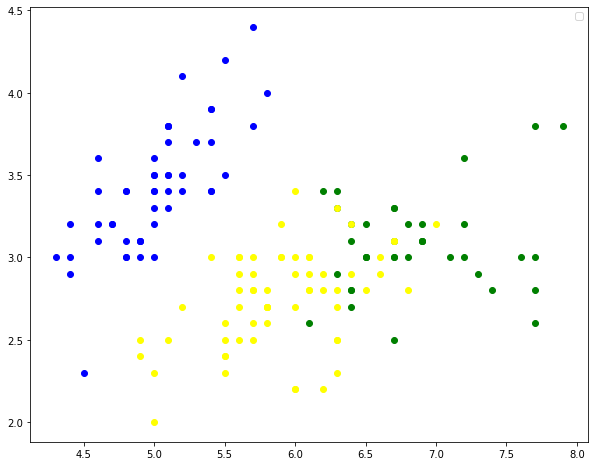

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(cluster1['SepalLengthCm'],cluster1['SepalWidthCm'],c= 'blue')
plt.scatter(cluster2['SepalLengthCm'],cluster2['SepalWidthCm'],c= 'green')
plt.scatter(cluster3['SepalLengthCm'],cluster3['SepalWidthCm'],c= 'yellow')
plt.show()

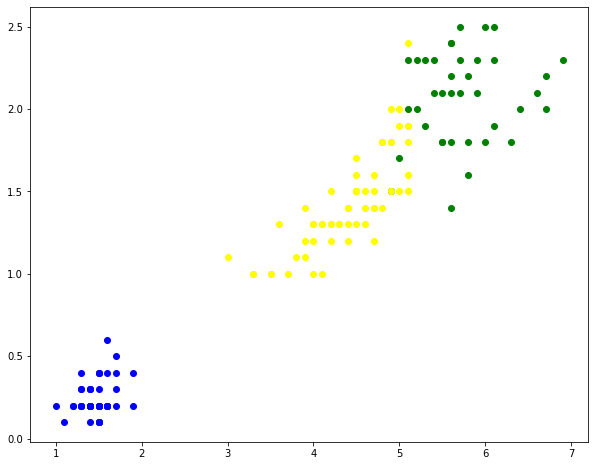

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(cluster1['PetalLengthCm'],cluster1['PetalWidthCm'],c= 'blue')
plt.scatter(cluster2['PetalLengthCm'],cluster2['PetalWidthCm'],c= 'green')
plt.scatter(cluster3['PetalLengthCm'],cluster3['PetalWidthCm'],c= 'yellow')
plt.show()

# Elbow Method for finding best K

## Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia and a low number of clusters ( K ).

In [45]:
df2 = X.drop('cluster',axis=1)
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
inertia = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2)
    inertia.append(km.inertia_)

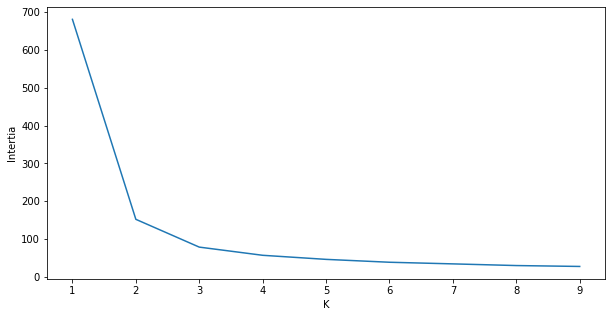

In [51]:
plt.figure(figsize=(10,5))
plt.plot(k_rng,inertia)
plt.xlabel('K')
plt.ylabel('Intertia')
plt.show()

## Article:

https://www.datacamp.com/community/tutorials/k-means-clustering-python